## Описание

**Контекст**

Массовые расстрелы - это инциденты, связанные с многочисленными жертвами насилия, связанного с огнестрельным оружием. <br>Исследования показывают, что с 2011 года частота массовых расстрелов в общественных местах утроилась. В период с 1982 по 2011 год массовые расстрелы происходили примерно раз в 200 дней. Однако в период с 2011 по 2014 год этот показатель значительно ускорился, и по крайней мере один массовый расстрел происходил в Соединенных Штатах каждые 64 дня. После 2014 года этот показатель еще больше увеличился и продолжает расти.<br>
В качестве причины высокого уровня массовых расстрелов называлась более высокая доступность оружия и владение им. В США самый высокий показатель владения оружием на душу населения в мире - 120,5 единиц огнестрельного оружия на 100 человек.

**Содержание**

Набор данных содержит список всех массовых расстрелов с 1924 по 2022 год:

 - Date: Дата съемки
 - City: Город, где произошла стрельба
 - State: Штат, в котором произошла стрельба.
 - Dead: Число жертв
 - Injured: Количество раненых
 - Total: Убитые + Раненые
 - Description: Описание съемки

**Что нужно делать с данными:**

 - Проанализировать тенденцию массовых расстрелов
 - Определите города и штаты с наибольшим количеством массовых расстрелов.
 - Рассчитать среднее число жертв в год
 - Облако слов с описанием съемки


## Загрузка и предобработка

In [338]:
#pip install wordcloud

In [339]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
from plotly import graph_objects as go
import plotly.express as px

In [340]:
# установим стандартный размер графиков для всего документа
%matplotlib inline
sns.set(rc={'figure.figsize':(23, 13)})

# устанавливает максимальную ширину столбца, что бы видеть все содержимое
pd.set_option('max_colwidth', 200) 

In [341]:
# загрузка файла с данными
df = pd.read_csv('C:/Users/pavel/project/my_data/History of Mass Shootings in the USA/history_of_mass_shootings_in_the_usa.csv')

In [342]:
print('Просмотр строк:')
display(df.sample(10))
print('-' * 80)
print('Общая информация:')
display(df.info())
print('-' * 80)
print('Имена столбцов:')
display(df.columns)
print('-' * 80)
print('Дубликаты:')
display(df.duplicated().sum())
print('-' * 80)
print('Пропуски:')
display(df.isna().sum())
print('-' * 80)
print('Стат. данные:')
display(df.describe())
print('-' * 80)

Просмотр строк:


,Date,City,State,Dead,Injured,Total,Description
1371,2020-08-04,Washington D.C.,Washington D.C.,0,4,4,Four men were wounded in an evening shooting.
1538,2020-06-10,Sacramento,California,1,3,4,"Shortly before midnight, officers discovered three adults men and one juvenile boy wounded by gunfire. One adult man died later at the hospital."
1281,2020-09-07,New Orleans,Louisiana,0,4,4,Four people including a fourteen-year-old boy were injured in Central City.
1283,2020-09-06,Commerce City,Colorado,0,4,4,Four people were wounded at a large house party after a fight broke out in the early morning.
1555,2020-06-02,Chicago,Illinois,0,4,4,Four males were wounded while standing on the sidewalk after the shooter approached them and open fire.
950,2021-04-16,Detroit,Michigan,0,4,4,Four people were shot at a vigil on the East Side.
2070,2019-04-21,Los Angeles,California,0,4,4,Four seniors were wounded by gunfire after a suspect opened fire in the vehicle behind them.
436,2021-12-13,Philadelphia,Pennsylvania,0,4,4,"Four adults were wounded in Kengsington, they were found by patrolling police."
2032,2019-05-20,Columbus,Ohio,0,4,4,Four people were injured in a shooting in the Hilltop neighborhood.
1989,2019-06-21,Richmond,California,0,5,5,Five people were wounded in a drive-by shooting.


--------------------------------------------------------------------------------
Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2488 non-null   object
 1   City         2488 non-null   object
 2   State        2488 non-null   object
 3   Dead         2488 non-null   int64 
 4   Injured      2488 non-null   int64 
 5   Total        2488 non-null   int64 
 6   Description  2488 non-null   object
dtypes: int64(3), object(4)
memory usage: 136.2+ KB


None

--------------------------------------------------------------------------------
Имена столбцов:


Index(['Date', 'City', 'State', 'Dead', 'Injured', 'Total', 'Description'], dtype='object')

--------------------------------------------------------------------------------
Дубликаты:


0

--------------------------------------------------------------------------------
Пропуски:


Date           0
City           0
State          0
Dead           0
Injured        0
Total          0
Description    0
dtype: int64

--------------------------------------------------------------------------------
Стат. данные:


,Dead,Injured,Total
count,2488.000000,2488.000000,2488.000000
mean,1.036977,4.077572,5.113344
std,1.562863,2.314447,2.578563
min,0.000000,0.000000,2.000000
25%,0.000000,3.000000,4.000000
50%,1.000000,4.000000,4.000000
75%,1.000000,5.000000,5.000000
max,23.000000,27.000000,46.000000


--------------------------------------------------------------------------------


In [343]:
df.columns = df.columns.str.lower()
df['date'] = df['date'].astype('datetime64[s]')
display(df['date'].min())
display(df['date'].max())
display(df.info())
display(df.head())

Timestamp('2018-01-01 00:00:00')

Timestamp('2022-07-23 00:00:00')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2488 entries, 0 to 2487
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2488 non-null   datetime64[ns]
 1   city         2488 non-null   object        
 2   state        2488 non-null   object        
 3   dead         2488 non-null   int64         
 4   injured      2488 non-null   int64         
 5   total        2488 non-null   int64         
 6   description  2488 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 136.2+ KB


None

,date,city,state,dead,injured,total,description
0,2022-07-23,Renton,Washington,1,6,7,"Seven people were shot, one fatally, shortly after midnight behind a concert hall."
1,2022-07-23,Chicago,Illinois,0,4,4,"A man got out of a black truck and opened fire with a rifle on a group of people in the East Garfield Park neighborhood, leaving four people injured."
2,2022-07-22,Maquoketa,Iowa,4,0,4,"Iowa State Park shooting: A man shot and killed three members of a family, including a child, as they were in their tent in Maquoketa Caves State Park before committing suicide in an apparent rand..."
3,2022-07-21,Los Angeles,California,0,4,4,Two men shot four people standing outside a CVS in the Historic Core.
4,2022-07-19,Lincoln,Nebraska,0,4,4,"Four people, including a teenager, were shot in the Hartley neighborhood."


In [344]:
display(df['city'].nunique())
display(df['state'].nunique())

808

54

In [345]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,date,city,state,dead,injured,total,description,year,month
0,2022-07-23,Renton,Washington,1,6,7,"Seven people were shot, one fatally, shortly after midnight behind a concert hall.",2022,7
1,2022-07-23,Chicago,Illinois,0,4,4,"A man got out of a black truck and opened fire with a rifle on a group of people in the East Garfield Park neighborhood, leaving four people injured.",2022,7
2,2022-07-22,Maquoketa,Iowa,4,0,4,"Iowa State Park shooting: A man shot and killed three members of a family, including a child, as they were in their tent in Maquoketa Caves State Park before committing suicide in an apparent rand...",2022,7
3,2022-07-21,Los Angeles,California,0,4,4,Two men shot four people standing outside a CVS in the Historic Core.,2022,7
4,2022-07-19,Lincoln,Nebraska,0,4,4,"Four people, including a teenager, were shot in the Hartley neighborhood.",2022,7


дубликатов нет, пропусков нет, форматы данных приведены к нужному типу

## Облако слов с описанием съемки

Пока ничего не изменено, составим облако слов.

<function matplotlib.pyplot.show(close=None, block=None)>

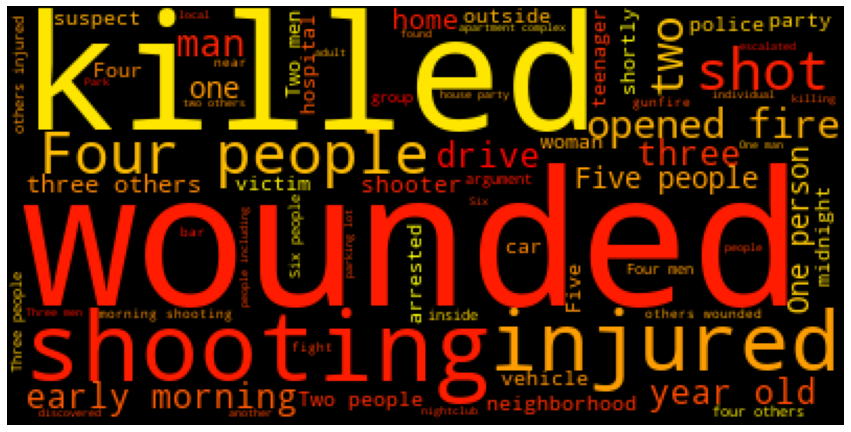

In [346]:
text = ' '.join(df['description'])
cloud = WordCloud(stopwords=STOPWORDS, colormap='autumn', max_words=70).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')
plt.show

срельба, ранены, убиты, четверо - самые частые слова.

## Анализ

### Тенденция массовых расстрелов

**По годам**

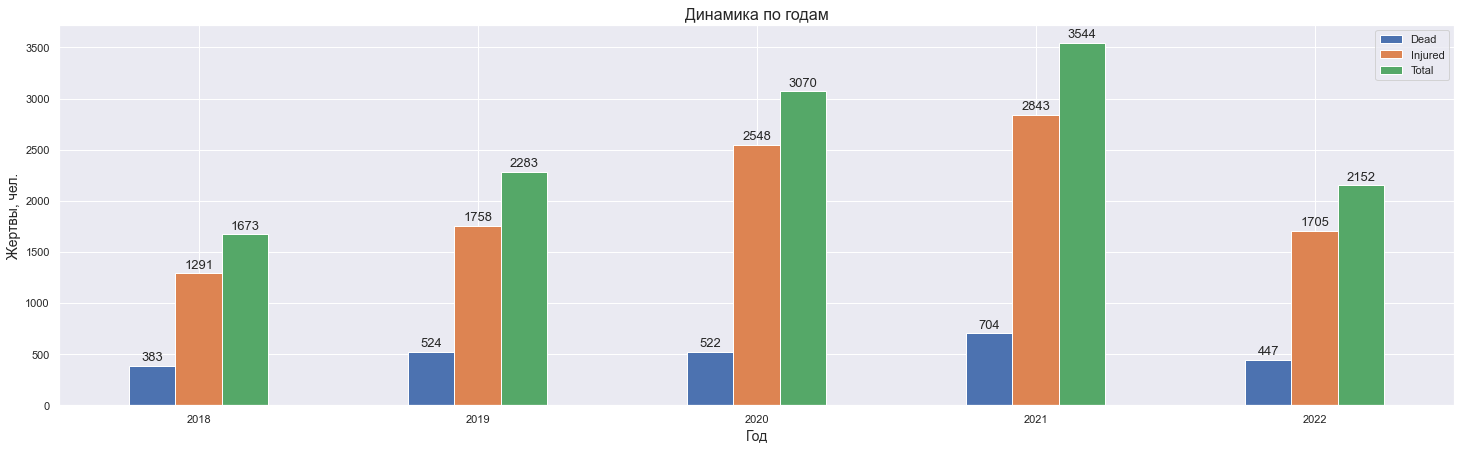

In [347]:
years_trend = df.pivot_table(index='year', values=['dead', 'injured', 'total'], aggfunc='sum').reset_index()
ax=years_trend.plot(x='year', y=['dead', 'injured', 'total'], kind='bar', figsize=(25, 7), rot=360)
for p in ax.patches:
	height = p.get_height()
	ax.text(p.get_x() + p.get_width() / 2,
					height + 50,
					'{:.0f}'.format(height),
					fontsize = 13,
					ha='center')
plt.legend(['Dead', 'Injured', 'Total'])
plt.title('Динамика по годам', size=16)
plt.xlabel('Год', size=14)
plt.ylabel('Жертвы, чел.', size=14)
plt.show()

Динамика увеличивается до 2021 года, в 2022 находится на отметке 2019 года.

In [375]:
month_trend = df.pivot_table(index=['year', 'month'], values=['dead', 'injured', 'total'], aggfunc='sum').reset_index()
month_trend.head()

,year,month,dead,injured,total
0,2018,1,23,89,112
1,2018,2,43,64,107
2,2018,3,15,68,83
3,2018,4,28,91,119
4,2018,5,30,123,153


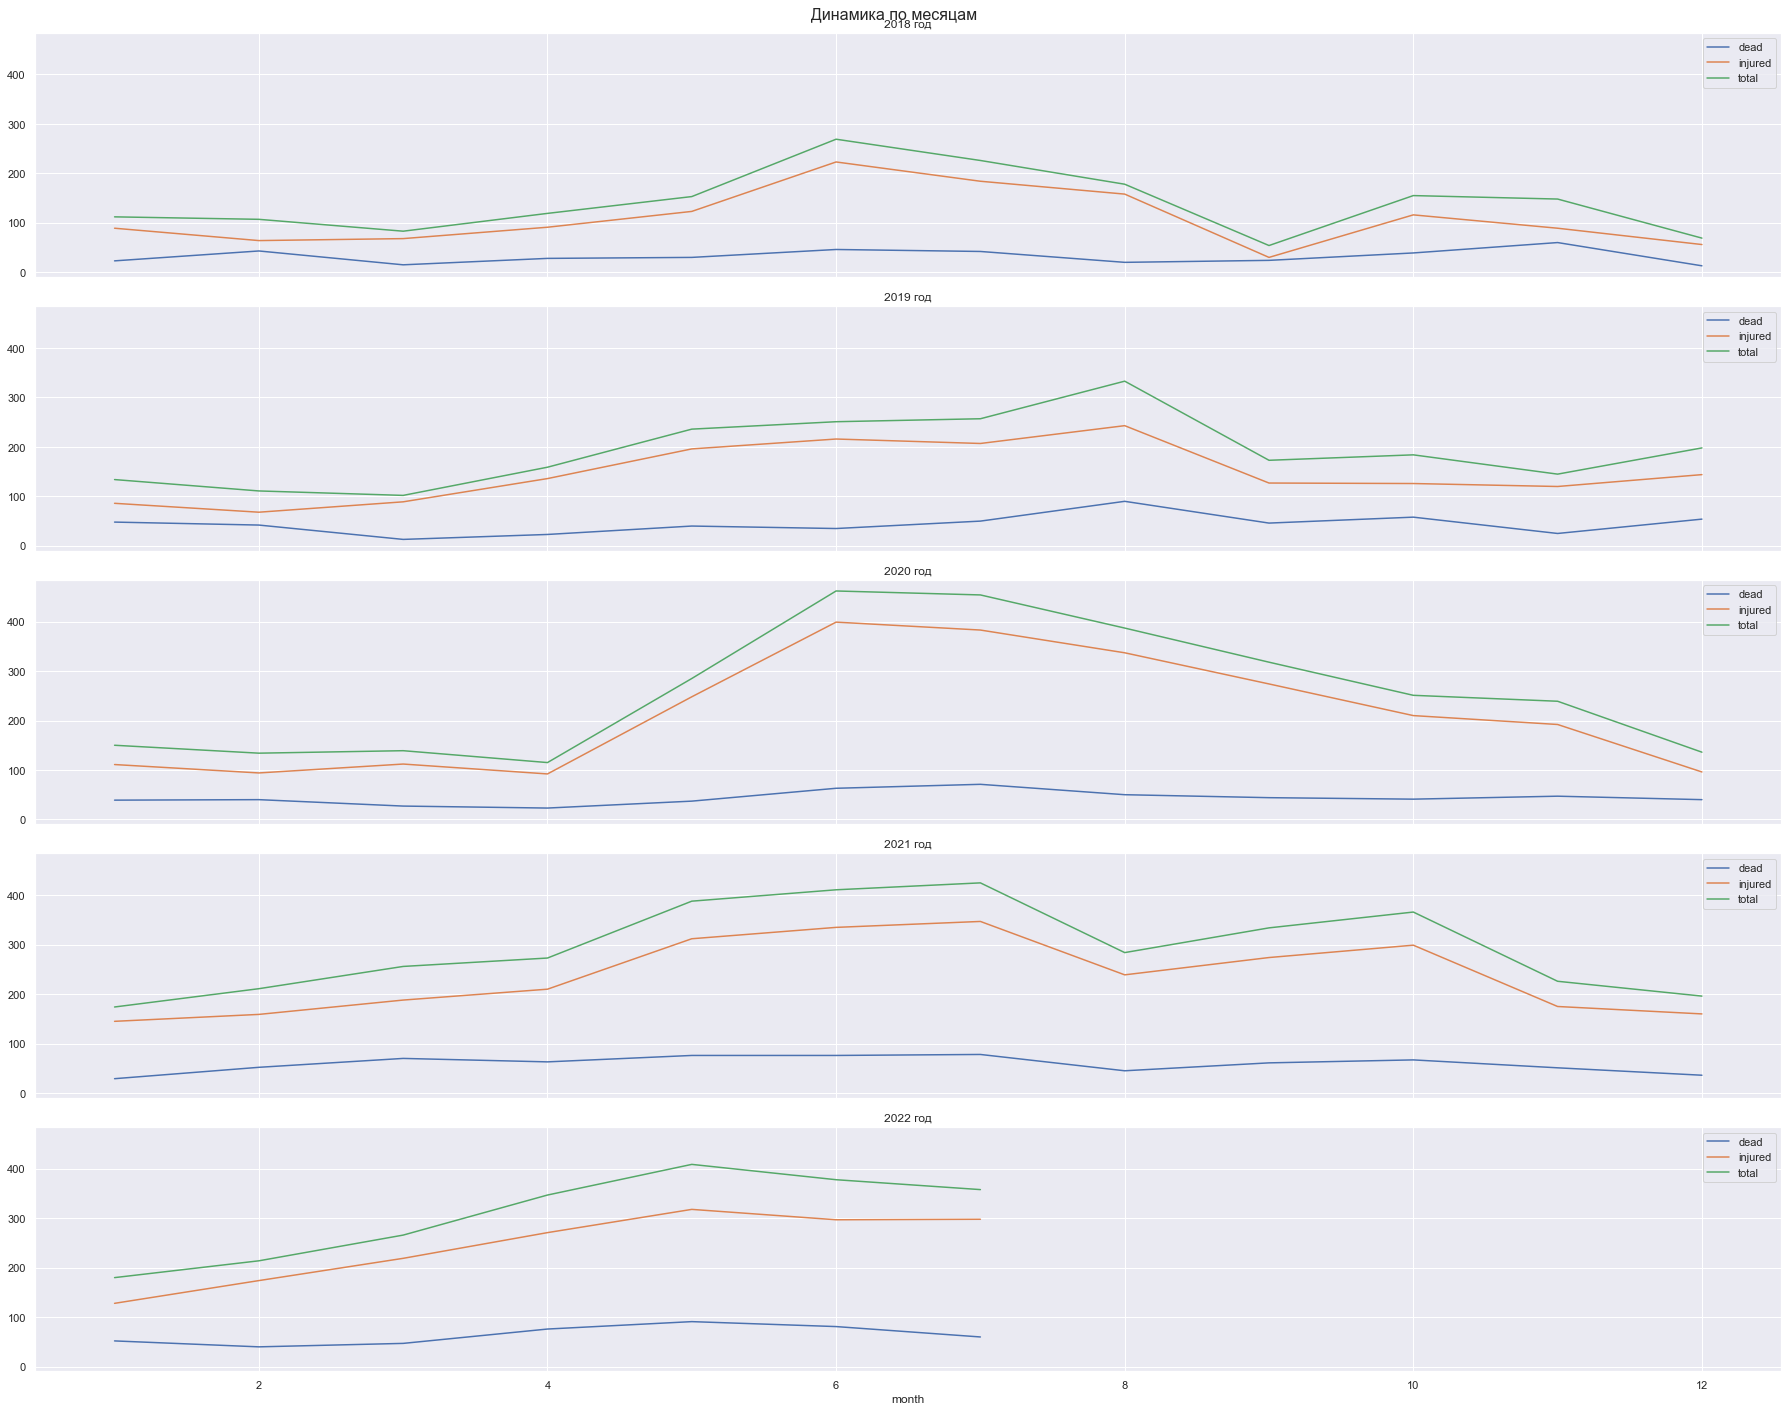

In [374]:
fig, (ax18, ax19, ax20, ax21, ax22) = plt.subplots(5, sharex=True, sharey=True, figsize=(25, 20))
fig.suptitle('Динамика по месяцам', size=16)
#ax.set_xlabel('Месяц')
#ax.set_ylabel('Кол-во жертв, чел.')

ax18 = month_trend[month_trend['year'] == 2018].plot(x='month', y=['dead', 'injured', 'total'], ax=ax18)
ax19 = month_trend[month_trend['year'] == 2019].plot(x='month', y=['dead', 'injured', 'total'], ax=ax19)
ax20 = month_trend[month_trend['year'] == 2020].plot(x='month', y=['dead', 'injured', 'total'], ax=ax20)
ax21 = month_trend[month_trend['year'] == 2021].plot(x='month', y=['dead', 'injured', 'total'], ax=ax21)
ax22 = month_trend[month_trend['year'] == 2022].plot(x='month', y=['dead', 'injured', 'total'], ax=ax22)

ax18.set_title('2018 год')
ax19.set_title('2019 год')
ax20.set_title('2020 год')
ax21.set_title('2021 год')
ax22.set_title('2022 год')
fig.tight_layout()

### Города и штаты с наибольшим количеством расстрелов

## Выводы